**Step 1: Project Details**

**Title: Covid-19 Chest XRay Image Recognition**

**Description: The project aims to build an image classification model that can identify Covid-19 positive patients by analyzing their chest X-ray images. By utilizing computer vision techniques, the model will be able to distinguish between healthy and Covid-19 infected lungs based on visual patterns present in the X-ray images**

**Dataset and Description: The dataset you will be using for this project is available on Kaggle, and it is called "Covid19 Image Dataset" by Pranav Raikokte. It presumably contains chest X-ray images of both Covid-19 positive and negative patients. You can use this dataset to train and evaluate your image classification model**

**Tags: Image Processing, Computer Vision (CV)**

**Dataset Source: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset**

**This project involves building a model to analyze medical images, which can have significant real-world applications in healthcare, especially during the ongoing Covid-19 pandemic. If you have any specific questions or need further assistance regarding your project, feel free to ask!**

**Step 2: Importing Libraries**

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

**Step 3: Data Preprocessing**

In [7]:
# Load and preprocess a sample image
img = cv2.imread("/content/drive/MyDrive/Capstone project/archive/Covid19-dataset/train/Normal/011.jpeg")
img = cv2.resize(img, (256, 256))
img = img / 255.0

# Data Augmentation
train_data = '/content/drive/MyDrive/Capstone project/archive/Covid19-dataset/train'
test_data = '/content/drive/MyDrive/Capstone project/archive/Covid19-dataset/test'
target_size = (256, 256)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1 / 255)


**Step 4: Model Building**

In [8]:
# Step 4: Model Building
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.23),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')  # 3 classes: Covid-19 Positive, Covid-19 Negative, and Virus
])

# Step 4: Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**Step 5: Model Training**

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Epoch 1/20
16/16 [==============================] - 78s 4s/step - loss: 2.2652 - accuracy: 0.4064 - val_loss: 1.0963 - val_accuracy: 0.4394
Epoch 2/20
16/16 [==============================] - 60s 4s/step - loss: 1.0276 - accuracy: 0.5139 - val_loss: 1.0076 - val_accuracy: 0.4394
Epoch 3/20
16/16 [==============================] - 60s 4s/step - loss: 0.7743 - accuracy: 0.6494 - val_loss: 0.6662 - val_accuracy: 0.7273
Epoch 4/20
16/16 [==============================] - 60s 4s/step - loss: 0.6285 - accuracy: 0.7649 - val_loss: 0.5904 - val_accuracy: 0.6818
Epoch 5/20
16/16 [==============================] - 60s 4s/step - loss: 0.7271 - accuracy: 0.6892 - val_loss: 0.6288 - val_accuracy: 0.7121
Epoch 6/20
16/16 [==============================] - 59s 4s/step - loss: 0.5671 - accuracy: 0.7331 - val_loss: 0.5286 - val_accuracy: 0.7121
Epoch 7/20
16/16 [==============================] - 57s 4s/step - loss: 0.6929 

**Step 6: Model Evaluation**

In [10]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

5/5 [==============================] - 3s 592ms/step - loss: 0.8700 - accuracy: 0.6818
Test Loss: 0.8700, Test Accuracy: 0.6818


**Step 7: Model Visualization**

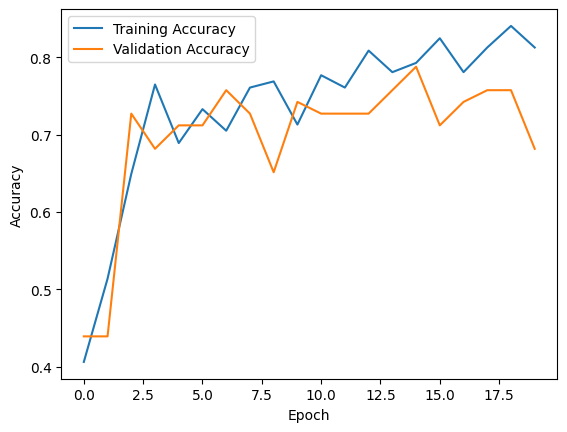

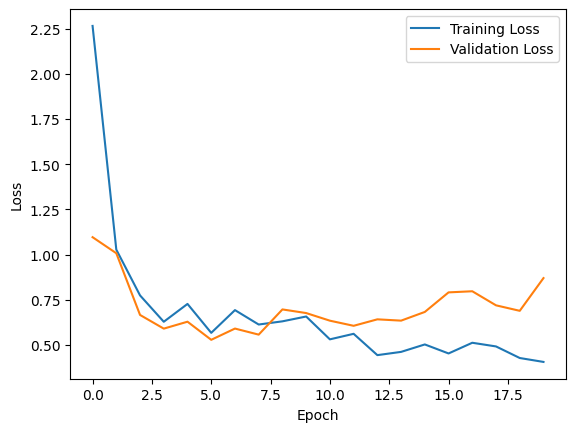

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 64)       

In [11]:
# Plot training and validation accuracy/loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print model summary
model.summary()

**Step 8: Making Predictions**

1/1 [==============================] - 0s 111ms/step


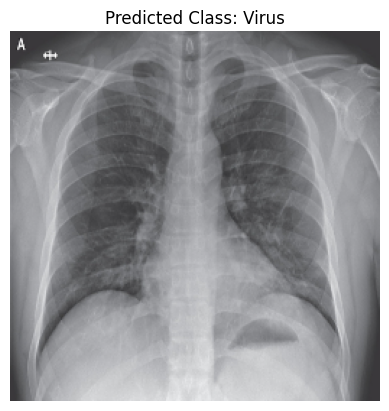

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess a sample test image for prediction
test_image = cv2.imread('/content/drive/MyDrive/Capstone project/archive/Covid19-dataset/test/Covid/0112.jpg')
test_image = cv2.resize(test_image, (256, 256))
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Make predictions
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions[0])
class_labels = {0: 'Virus', 1: 'Normal', 2: 'Covid'}
predicted_label = class_labels[predicted_class]

# Convert the image to the appropriate color depth (CV_8U) before displaying
test_image_rgb = cv2.cvtColor((test_image[0] * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)

# Display the image and prediction
plt.imshow(test_image_rgb)
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()


**Data Analysis**

In [27]:
# Count the number of images in each class
train_counts = train_generator.classes
test_counts = test_generator.classes
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

train_class_counts = {class_labels[i]: np.count_nonzero(train_counts == i) for i in range(len(class_labels))}
test_class_counts = {class_labels[i]: np.count_nonzero(test_counts == i) for i in range(len(class_labels))}

print("Train Class Counts:", train_class_counts)
print("Test Class Counts:", test_class_counts)



Train Class Counts: {'Covid': 111, 'Normal': 70, 'Viral Pneumonia': 70}
Test Class Counts: {'Covid': 26, 'Normal': 20, 'Viral Pneumonia': 20}


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predicted labels for the test data
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(class_labels.values())))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


5/5 [==============================] - 3s 580ms/step
Classification Report:
                 precision    recall  f1-score   support

          Covid       0.35      0.23      0.28        26
         Normal       0.26      0.30      0.28        20
Viral Pneumonia       0.42      0.55      0.48        20

       accuracy                           0.35        66
      macro avg       0.35      0.36      0.35        66
   weighted avg       0.35      0.35      0.34        66

Confusion Matrix:
[[ 6 10 10]
 [ 9  6  5]
 [ 2  7 11]]


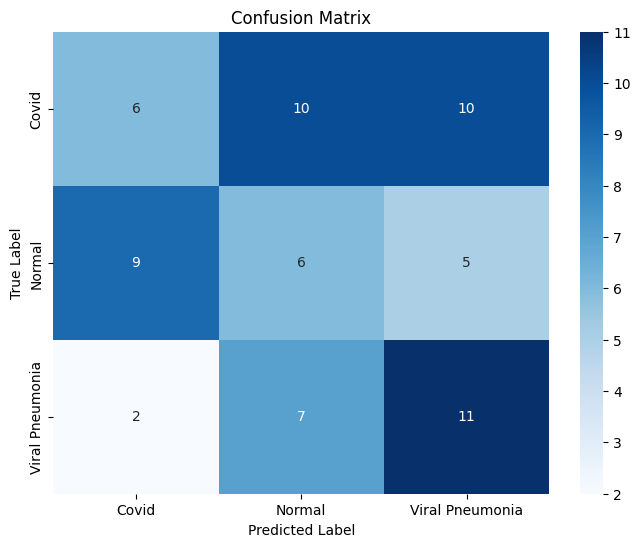

In [29]:
# Plot the confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()